# Unconstrained model

## Topological tube network

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [2]:
path=os.getcwd()
path

os.chdir(path+'/underground/')

g_shp=nx.read_shp('underground.shp',geom_attrs=False)

df = nx.to_pandas_edgelist(g_shp)

# add station name to node
nod_st1={(e1):weight for e1, e2, weight in g_shp.edges(data='station_1_')}
nod_st2={(e2):weight for e1, e2, weight in g_shp.edges(data='station_2_')}

nod_all = nod_st1.copy()
nod_all.update(nod_st2)

nx.set_node_attributes(g_shp,nod_all,'station')

# convert to undirected
g_shp_un = g_shp.to_undirected()

# ID assignment
nod_coord = {(e1):e1 for e1 in g_shp_un.nodes()}
nx.set_node_attributes(g_shp_un,nod_coord,'station_coord')

node_list = list(g_shp_un.nodes())
mapping = {node_list[i]:i for i in range(len(node_list))}
g_shp_un = nx.relabel_nodes(g_shp_un, mapping)

nodes = [(x,y) for x,y in g_shp_un.nodes(data='station') if 'Heathrow' in str(y)]

g_shp_un.nodes[258]['station']='Heathrow Terminals 123'

## flow data from one station to another

In [4]:
# read in flow data
os.chdir('/Users/zhangjiawei/week1/TubeCommuters_Practical')
orig_dest = pd.read_csv('ODtube2017.csv')
orig_dest.head(10)

,From,station_name,To,station_name.1,total_wtrips
0,500,Acton Town,505,Alperton,143
1,500,Acton Town,506,Amersham,22
2,500,Acton Town,507,Angel,15
3,500,Acton Town,508,Archway,9
4,500,Acton Town,510,Arsenal,9
5,500,Acton Town,511,Baker Street,19
6,500,Acton Town,513,Bank,226
7,500,Acton Town,501,Barbican,7
8,500,Acton Town,516,Barons Court,36
9,500,Acton Town,517,Bayswater,2


In [12]:
orig_dest['From'].unique()

array([500, 502, 503, 505, 506, 507, 508, 509, 510, 511, 512, 513, 501,
       514, 515, 516, 517, 518, 519, 787, 520, 521, 522, 524, 525, 526,
       527, 528, 529, 778, 530, 531, 532, 534, 535, 788, 852, 884, 536,
       537, 539, 540, 541, 718, 543, 544, 545, 546, 547, 548, 549, 550,
       551, 552, 553, 554, 555, 556, 557, 558, 560, 561, 562, 563, 565,
       566, 567, 564, 568, 774, 569, 570, 571, 542, 572, 574, 575, 576,
       577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 590,
       589, 591, 592, 593, 773, 594, 595, 596, 597, 598, 779, 781, 780,
       601, 602, 605, 603, 604, 606, 607, 608, 609, 610, 611, 612, 613,
       614, 615, 616, 617, 619, 620, 621, 622, 623, 625, 624, 626, 627,
       628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640,
       641, 642, 643, 646, 645, 647, 648, 649, 650, 653, 654, 789, 656,
       659, 655, 657, 660, 661, 662, 663, 664, 665, 667, 668, 669, 670,
       671, 672, 673, 674, 776, 675, 676, 677, 678, 680, 679, 68

In [6]:
pivotable = orig_dest.pivot_table(values ="total_wtrips", index="From", columns = "To",
                            aggfunc=np.sum, margins=True)



pivotable

To,500,501,502,503,505,506,507,508,509,510,...,779,780,781,784,787,788,789,852,884,All
From,,,,,,,,,,,,,,,,,,,,,
500,NaN,7.0,NaN,NaN,143.0,22.0,15.0,9.0,NaN,9.0,...,0.0,2.0,105.0,30.0,0.0,0.0,20.0,62.0,63.0,5910
501,NaN,NaN,210.0,128.0,NaN,7.0,NaN,0.0,NaN,NaN,...,NaN,14.0,NaN,NaN,NaN,47.0,0.0,12.0,1.0,10822
502,0.0,213.0,NaN,NaN,NaN,0.0,46.0,12.0,22.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,9974
503,22.0,294.0,NaN,NaN,NaN,NaN,121.0,0.0,0.0,NaN,...,NaN,NaN,0.0,NaN,NaN,123.0,104.0,NaN,87.0,11598
505,192.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,6.0,...,126.0,2.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,3084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,NaN,78.0,NaN,254.0,NaN,NaN,341.0,71.0,27.0,0.0,...,0.0,70.0,0.0,1660.0,229.0,NaN,619.0,4351.0,2148.0,36546
789,12.0,51.0,NaN,245.0,NaN,2.0,177.0,16.0,60.0,NaN,...,NaN,7.0,0.0,781.0,271.0,586.0,NaN,2254.0,746.0,23246
852,12.0,10.0,NaN,NaN,NaN,7.0,226.0,82.0,NaN,41.0,...,84.0,44.0,5.0,1196.0,747.0,2689.0,1502.0,NaN,1951.0,53207


In [4]:
# # population flow from that station,population flow to another station

# pop_from = pd.DataFrame(orig_dest.groupby(["From"])["total_wtrips"].agg(np.sum))
# #orig_dest['pop_from']=orig_dest.groupby(['From'])['total_wtrips'].agg(np.sum)
# pop_to = pd.DataFrame(orig_dest.groupby(["To"])["total_wtrips"].agg(np.sum))
# #pop_to=orig_dest.groupby(['To'])['total_wtrips'].agg('sum')

# #rename the column name
# pop_from.rename(columns={"total_wtrips": "pop_from"},inplace=True)
# pop_to.rename(columns={"total_wtrips": "pop_to"},inplace=True)

# #merge back in big dataset

# orig_dest = orig_dest.merge(pop_from, left_on = "From", right_on ="From")
# #orig_dest.drop(columns = ["code"], inplace = True)
# orig_dest = orig_dest.merge(pop_to, left_on = "To", right_on ="To")

### convert to directed graph

In [5]:
# convert to graph, use the distance from topological tube network
g_OD = nx.from_pandas_edgelist(orig_dest, 'station_name', 'station_name.1',['total_wtrips'],create_using=nx.DiGraph)

nod_names={(e1):e1 for e1 in g_OD.nodes()}
nx.set_node_attributes(g_OD,nod_names,'station')

mapping = {g_shp_un.nodes[i]['station']:i for i in g_shp_un.nodes()} 
g_OD = nx.relabel_nodes(g_OD, mapping)

nod_coords={(e1):coord for e1, coord in g_shp_un.nodes(data='station_coord')} 
nx.set_node_attributes(g_OD,nod_coords,'station_coord')

list(g_OD.nodes(data=True))[0:10]

[(111, {'station': 'Acton Town', 'station_coord': (-0.2801, 51.5028)}),
 (238, {'station': 'Alperton', 'station_coord': (-0.2997, 51.5407)}),
 (172, {'station': 'Amersham', 'station_coord': (-0.607, 51.6736)}),
 (196, {'station': 'Angel', 'station_coord': (-0.1058, 51.5322)}),
 (198, {'station': 'Archway', 'station_coord': (-0.1353, 51.5653)}),
 (244, {'station': 'Arsenal', 'station_coord': (-0.1059, 51.5586)}),
 (0, {'station': 'Baker Street', 'station_coord': (-0.1571, 51.5226)}),
 (25, {'station': 'Bank', 'station_coord': (-0.0886, 51.5133)}),
 (77, {'station': 'Barbican', 'station_coord': (-0.0979, 51.5204)}),
 (100, {'station': 'Barons Court', 'station_coord': (-0.2139, 51.4905)})]

In [6]:
## edge!
# id ：We can add the stations id number as attributes to the edges:
nod_id1={(e1,e2):(e1) for e1, e2 in g_OD.edges()}
nx.set_edge_attributes(g_OD,nod_id1,'station_1')# graph, values, name to display

nod_id2={(e1,e2):(e2) for e1, e2 in g_OD.edges()}
nx.set_edge_attributes(g_OD,nod_id2,'station_2')

# name ：we can also add the stations name to the edge attributes from the nodes attributes:
nod_name1={(e1,e2):(g_OD.nodes[e1]['station']) for e1, e2 in g_OD.edges()}
nod_name2={(e1,e2):(g_OD.nodes[e2]['station']) for e1, e2 in g_OD.edges()}

nx.set_edge_attributes(g_OD,nod_name1,'station_1_')
nx.set_edge_attributes(g_OD,nod_name2,'station_2_')

list((g_OD.edges(data=True)))[0]

(111,
 238,
 {'total_wtrips': 143,
  'station_1': 111,
  'station_2': 238,
  'station_1_': 'Acton Town',
  'station_2_': 'Alperton'})

In [7]:
# use the complete network to build adj  
N=len(g_shp_un.nodes()) 
distance=np.zeros((N, N))

for e1,e2 in g_OD.edges:
    try:
        dis = nx.dijkstra_path_length(g_shp_un,e1,e2,weight='distance')  #undirected network path only for flow
        distance[e1,e2]=dis
    except:
        continue    #only those nodes that are connected have values


In [10]:
# stack the dataframe
df_distance = pd.DataFrame(distance)
pivot=df_distance.stack().to_frame(name='distance')
O_D_distance=pivot.reset_index(level=[0, 1])
O_D_distance.rename(columns={"level_0": "station_1","level_1":"station_2"},inplace=True)

#merge back in
cdata = nx.to_pandas_edgelist(g_OD)
cdata = cdata.merge(O_D_distance)

#len(list(cdata.distance.unique()))
#test=cdata.loc[cdata['distance'] > 0]
#test.distance.count()

# population flow from that station,population flow to another station

pop_from = pd.DataFrame(cdata.groupby(["station_1"])["total_wtrips"].agg(np.sum))
#orig_dest['pop_from']=orig_dest.groupby(['From'])['total_wtrips'].agg(np.sum)
pop_to = pd.DataFrame(cdata.groupby(["station_2"])["total_wtrips"].agg(np.sum))
#pop_to=orig_dest.groupby(['To'])['total_wtrips'].agg('sum')

#rename the column name
pop_from.rename(columns={"total_wtrips": "population"},inplace=True)
pop_to.rename(columns={"total_wtrips": "jobs"},inplace=True)
cdata.rename(columns={"total_wtrips": "Total","distance":'Dist',
                     "station_1_":"Orig","station_2_":"Dest",
                     "station_1":"OrigCode","station_2":"DestCode"},inplace=True)

#merge back in big dataset

cdata = cdata.merge(pop_from, left_on = "OrigCode", right_on ="station_1")
#orig_dest.drop(columns = ["code"], inplace = True)
cdata = cdata.merge(pop_to, left_on = "DestCode", right_on ="station_2")

cdata

,source,target,DestCode,Orig,OrigCode,Total,Dest,Dist,population,jobs
0,111,238,238,Acton Town,111,143,Alperton,4785.556297,5910,2961
1,172,238,238,Amersham,172,83,Alperton,31267.162962,2185,2961
2,196,238,238,Angel,196,41,Alperton,19653.911966,15124,2961
3,244,238,238,Arsenal,244,14,Alperton,21822.468189,3320,2961
4,25,238,238,Bank,25,44,Alperton,18991.049336,79588,2961
...,...,...,...,...,...,...,...,...,...,...
33966,72,129,129,South Woodford,72,20,Upminster Bridge,24206.073670,5772,1321
33967,135,129,129,Upminster,135,214,Upminster Bridge,1161.583961,3746,1321
33968,119,129,129,Upton Park,119,18,Upminster Bridge,14272.568062,10318,1321
33969,109,129,129,West Ham,109,8,Upminster Bridge,16391.363195,14672,1321


## calibrate the parameter

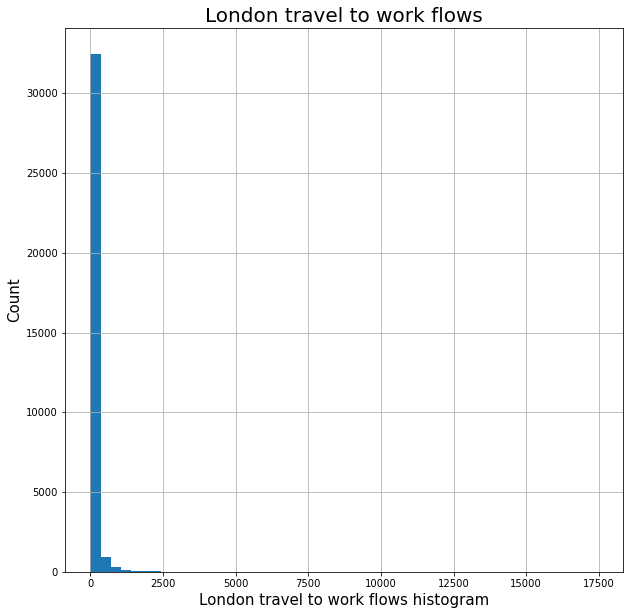

In [11]:
#distrbution of our flows
plt.subplots(figsize=(10,10))

plt.hist(cdata["Total"], histtype="stepfilled" , bins = 50)
plt.xlabel("London travel to work flows histogram", fontsize = 15)
plt.ylabel("Count", fontsize= 15)
plt.title("London travel to work flows", fontsize = 20)
plt.grid(True)

Text(0, 0.5, 'log(Total)')

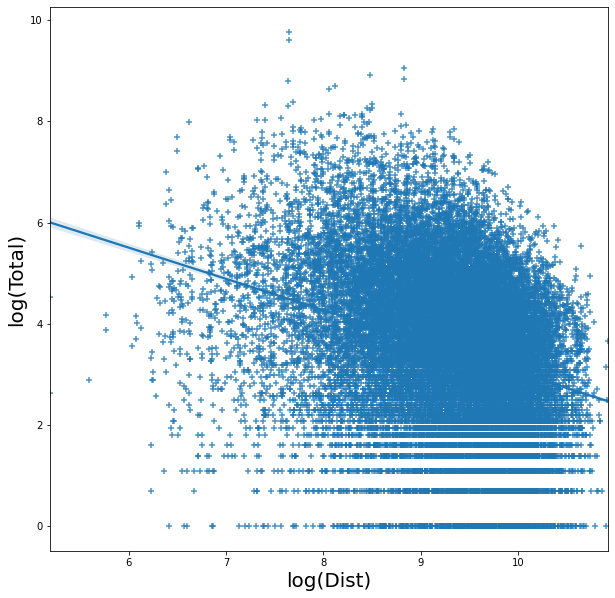

In [12]:
#subset the dataframe to the flows we want
cdata_flows = cdata[["Total", "Dist"]]
#remove all 0 values (logarithms can't deal with 0 values)
cdata_flows = cdata_flows[(cdata_flows!=0).all(1)]

#extract the x and y converting to log
x = np.log(cdata_flows["Dist"])
y = np.log(cdata_flows["Total"])

#create the subplot
fig, ax = plt.subplots(figsize = (10,10))
#plot the results along with the line of best fit
sns.regplot(x=x, y=y, marker="+", ax=ax)
ax.set_xlabel("log(Dist)", fontsize = 20)
ax.set_ylabel("log(Total)", fontsize = 20)

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#take the variables and produce logarithms of them
x_variables = ["population", "jobs", "Dist"]
log_x_vars = []
for x in x_variables:
    cdata[f"log_{x}"] = np.log(cdata[x])
    log_x_vars.append(f"log_{x}")
    
log_x_vars

['log_population', 'log_jobs', 'log_Dist']

In [17]:
#create the formula
formula = 'Total ~ log_population + log_jobs + log_Dist' # don't contain constant

#run the regression
uncosim = smf.glm(formula = formula, data=cdata, family=sm.families.Poisson()).fit()
print(uncosim.summary())
      
# We can also see from the other outputs that all variables are highly significant 
# (P>|z| < 0.01), with the z-scores revealing that distance has the most influence
# on the model (as we might have expected from the scatter plots we produced earlier 
# which showed that distance had by far the strongers correlation with commuting flows

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Total   No. Observations:                33971
Model:                            GLM   Df Residuals:                    33967
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.8336e+06
Date:                Wed, 14 Apr 2021   Deviance:                   3.5135e+06
Time:                        22:57:34   Pearson chi2:                 5.60e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -7.1328      0.014   -517.

In [20]:
#first assign the parameter values from the model to the appropriate variables
K = uncosim.params[0]
alpha = uncosim.params[1]
gamma = uncosim.params[2]
beta = -uncosim.params[3] #positive

#now plug everything back into the Equation 6 model ... 
#be careful with the negative signing of the parameter beta
cdata["unconstrainedEst2"] = np.exp(K + alpha*cdata["log_population"] 
                                    + gamma*cdata["log_jobs"] 
                                    - beta*cdata["log_Dist"])

In [21]:
#round the numbers so that we don't get a half of a person
cdata["unconstrainedEst2"] = round(cdata["unconstrainedEst2"], 0)
#convert to integers
cdata["unconstrainedEst2"] = cdata["unconstrainedEst2"].astype(int)
#check that the sum of these estimates make sense
sum(cdata["unconstrainedEst2"])

2838903

In [22]:
cdata_estimate= cdata.pivot_table(values ="unconstrainedEst2", 
                                  index="Orig", columns = "Dest",
                                aggfunc=np.sum, margins=True)
cdata_estimate

Dest,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
Orig,,,,,,,,,,,,,,,,,,,,,
Acton Town,NaN,NaN,NaN,18.0,5.0,49.0,24.0,NaN,9.0,72.0,...,NaN,56.0,22.0,NaN,37.0,9.0,27.0,NaN,NaN,5660
Aldgate,28.0,NaN,NaN,NaN,8.0,116.0,44.0,22.0,17.0,128.0,...,NaN,NaN,36.0,NaN,52.0,NaN,49.0,28.0,18.0,11387
Aldgate East,32.0,NaN,NaN,NaN,NaN,128.0,49.0,24.0,NaN,143.0,...,58.0,231.0,NaN,NaN,58.0,NaN,NaN,32.0,NaN,13278
Alperton,16.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,5.0,39.0,...,NaN,NaN,NaN,NaN,20.0,NaN,15.0,NaN,NaN,2100
Amersham,NaN,12.0,NaN,5.0,NaN,16.0,NaN,NaN,NaN,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,NaN,NaN,21.0,6.0,NaN,25.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,NaN,2298
Wood Green,NaN,70.0,81.0,19.0,NaN,101.0,NaN,45.0,23.0,132.0,...,56.0,NaN,40.0,NaN,57.0,NaN,NaN,NaN,NaN,11330
Woodford,NaN,42.0,49.0,NaN,NaN,53.0,25.0,NaN,NaN,69.0,...,31.0,69.0,NaN,NaN,33.0,NaN,NaN,NaN,NaN,5963


In [23]:
cdata_real = pd.pivot_table(cdata, values ="Total", index="Orig", columns = "Dest",
                            aggfunc=np.sum, margins=True)
cdata_real

Dest,Acton Town,Aldgate,Aldgate East,Alperton,Amersham,Angel,Archway,Arnos Grove,Arsenal,Baker Street,...,White City,Whitechapel,Willesden Green,Willesden Junction,Wimbledon,Wimbledon Park,Wood Green,Woodford,Woodside Park,All
Orig,,,,,,,,,,,,,,,,,,,,,
Acton Town,NaN,NaN,NaN,143.0,22.0,15.0,9.0,NaN,9.0,19.0,...,NaN,10.0,0.0,NaN,71.0,97.0,27.0,NaN,NaN,5910
Aldgate,0.0,NaN,NaN,NaN,0.0,46.0,12.0,22.0,0.0,271.0,...,NaN,NaN,18.0,NaN,7.0,NaN,43.0,4.0,0.0,9974
Aldgate East,22.0,NaN,NaN,NaN,NaN,121.0,0.0,0.0,NaN,21.0,...,8.0,592.0,NaN,NaN,2.0,NaN,NaN,4.0,NaN,11556
Alperton,192.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,6.0,6.0,...,NaN,NaN,NaN,NaN,49.0,NaN,0.0,NaN,NaN,3084
Amersham,NaN,52.0,NaN,83.0,NaN,4.0,NaN,NaN,NaN,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wimbledon Park,NaN,NaN,24.0,0.0,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,533.0,NaN,NaN,NaN,NaN,2504
Wood Green,NaN,8.0,60.0,27.0,NaN,99.0,NaN,231.0,0.0,35.0,...,45.0,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,12714
Woodford,NaN,19.0,68.0,NaN,NaN,19.0,0.0,NaN,NaN,36.0,...,44.0,206.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,7002


In [24]:
import scipy.stats

def CalcRSqaured(observed, estimated):
    """Calculate the r^2 from a series of observed and estimated target values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    r, p = scipy.stats.pearsonr(observed, estimated)
    R2 = r **2
    
    return R2

CalcRSqaured(cdata["Total"], cdata["unconstrainedEst2"])

0.3665565495624539

In [25]:
from math import sqrt

def CalcRMSE(observed, estimated):
    """Calculate Root Mean Square Error between a series of observed and estimated values
    inputs:
    Observed: Series of actual observed values
    estimated: Series of predicted values"""
    
    res = (observed -estimated)**2
    RMSE = round(sqrt(res.mean()), 3)
    
    return RMSE

CalcRMSE(cdata["Total"], cdata["unconstrainedEst2"])

207.862

In [26]:
cdata.to_csv("flow_data_with_distance.csv")